In [83]:
import pickle
import gzip
import numpy as np

def auto_norm(dataset):

    minvalue = np.min(dataset, axis=0)
    maxvalue = np.max(dataset, axis=0)
    ranges = maxvalue - minvalue
    norm_dataset = (dataset - minvalue) / ranges
    return norm_dataset, ranges, minvalue

"""
函数说明:打开并解析文件，对数据进行分类：1代表不喜欢,2代表魅力一般,3代表极具魅力
Parameters:
	filename - 文件名
Returns:
	returnMat - 特征矩阵
	classLabelVector - 分类Label向量
"""
def file2matrix(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())  # get the number of lines in the file
    returnMat = np.zeros((numberOfLines, 3))
    # prepare matrix to return
    classLabelVector = []  # prepare labels return
    index = 0
    fr = open(filename)
    for line in fr.readlines():
        line = line.strip()  # remove off ‘\n’
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))  # for datingTestSet.txt
        #classLabelVector.append( 0.01*ord(listFromLine[-1][0]))
        index += 1
    return returnMat, classLabelVector


"""
函数说明:对数据进行归一化
Parameters:
	dataSet - 特征矩阵
Returns:
	normDataSet - 归一化后的特征矩阵
	ranges - 数据范围
	minVals - 数据最小值
"""
def autoNorm(dataSet):
    minVals = dataSet.min(0)  #按列求最小值
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1))
    normDataSet = normDataSet/tile(ranges, (m,1))
    #element wise divide
    return normDataSet, ranges, minVals

"""
函数说明:把数据转换成独热码（有多少个状态就有多少比特，而且只有一个比特为1，其他全为0的一种码制）
"""
def to_one_hot(y):
    n_cls = y.max()
    m = len(y)
    Y = np.zeros((m, n_cls))
    Y[np.arange(m), y-1] = 1
    return Y

"""
函数说明:逻辑回归：归一化指数函数
"""
def softmax(probs):
    exps = np.exp(probs)
    exp_sums = np.sum(exps, axis=1,keepdims=True)
    return exps / exp_sums


def multiTest(dataX, datay):
    # 学习率
    eta = 0.01
    n_iterations = 1001# 迭代次数
    # 训练集样本数量
    m = len(dataX)
      # 初始化权重 n_inputs * n_outputs 的随机矩阵4*3，[-1, 1]区间内
    ws = np.random.randn(4, 3)
    # 迭代
    for iteration in range(n_iterations):
        logits = dataX.dot(ws)
        # softmax函数计算
        Y_proba = softmax(logits)
        # 计算损失
        loss = -np.mean(np.sum(datay * np.log(Y_proba), axis=1))
        # 计算得到的Y预测值与目标值之间的误差
        error = Y_proba - datay
        if iteration % 500 == 0:
            print("迭代次数：%s 损失：%s" % (iteration, loss))
        # 计算梯度向量
        grads = 1 / m * dataX.T.dot(error)
        # 更新权重
        ws = ws - eta * grads
    return ws


if __name__ == '__main__':
    # 训练集
    datingDataMat, datingLabels = file2matrix('datingTestSet.txt')
    trainData, ranges, minVals=auto_norm(datingDataMat)
    traindataX= np.c_[np.ones([len(trainData), 1]),trainData]  # 在第一列插入常数项1
    traindatay = to_one_hot(np.array(datingLabels))
    # 测试算法
    ws = multiTest(traindataX, traindatay)
    ffMiles = float(input("frequent flier miles earned per year?"))
    percentTags = float(input("percentage of time spent playing video games?"))
    iceCreams = float(input("liters of ice cream consumed per year?"))
    inArr=np.array([ffMiles,percentTags,iceCreams])
    inArr = (inArr-minVals)/ranges
    inX=np.append([1],inArr)
    probs=inX.dot(ws)
    classifierResult=np.argmax(probs)+1
    print("You probably like this person: in %s"% classifierResult)

迭代次数：0 损失：2.972208856299615
迭代次数：500 损失：1.1995512455872752
迭代次数：1000 损失：0.9186504267765199


frequent flier miles earned per year? 4000
percentage of time spent playing video games? 8
liters of ice cream consumed per year? 1


You probably like this person: in 3


In [78]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
'''
散点图使用datingDataMat矩阵的第二，第三列数据，分别表示特征值“玩视频游戏所耗时间百分比”
和“每周所消费的冰淇凌公升数”
'''
 #无样本类别标签的约会数据散点图
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
#加入这两行可以避免plt画图报找不到字体的错误，这样就可以输出中文字体
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费的冰淇淋公升数')
plt.show()

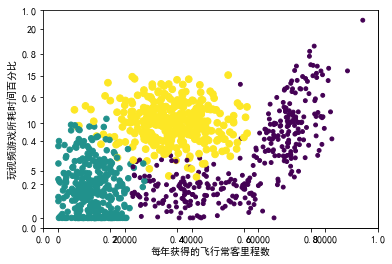

In [79]:
#带有分类标签的约会数据散点图
import numpy as np
import array
from numpy import *
import matplotlib.pyplot as plt
#import matplotlib.image as mping
fig=plt.figure()
plt.xlabel("每年获得的飞行常客里程数")
plt.ylabel("玩视频游戏所耗时间百分比")
# plt.xlabel("玩视频游戏所耗时间百分比")
# plt.ylabel("每周所消费的冰淇淋公升数")
ax = fig.add_subplot(1,1,1)
#ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15*array(datingLabels))
plt.show()

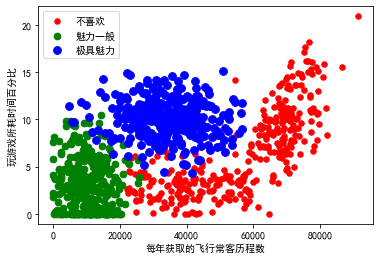

In [81]:
import numpy as np
import array
from numpy import *
import matplotlib.pyplot as plt
import KNN
dating_data_mat, dating_labels = KNN.file2matrix('datingTestSet.txt')
fig = plt.figure()
ax = fig.add_subplot(111)
dating_labels = np.array(dating_labels)
idx_1 = np.where(dating_labels == 1)
p1 = ax.scatter(dating_data_mat[idx_1, 0], dating_data_mat[idx_1, 1], marker='o', color='r', label='不喜欢', s=30)
idx_2 = np.where(dating_labels == 2)
p2 = ax.scatter(dating_data_mat[idx_2, 0], dating_data_mat[idx_2, 1], marker='o', color='g', label='魅力一般', s=45)
idx_3 = np.where(dating_labels == 3)
p3 = ax.scatter(dating_data_mat[idx_3, 0], dating_data_mat[idx_3, 1], marker='o', color='b', label='极具魅力', s=60)
plt.legend(loc='upper left')
plt.xlabel("每年获取的飞行常客历程数")
plt.ylabel("玩游戏所耗时间百分比")
plt.show()

In [82]:
#分类器针对约会网站的测试代码
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print('the classifier came back with: %d, the real answer is: %d' % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print('the total error rate is: %f' % (errorCount/float(numTestVecs)))